<a href="https://colab.research.google.com/github/4232177191/project1/blob/main/deiabet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal number of clusters: 5


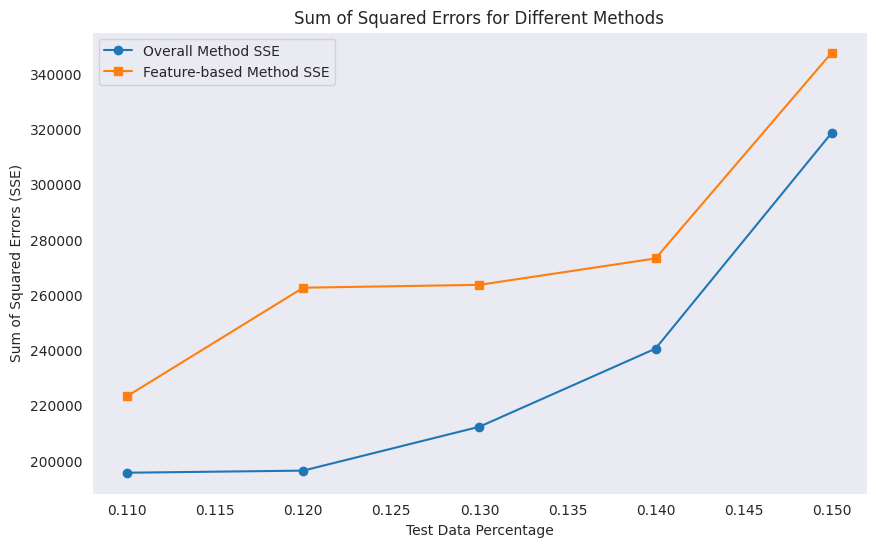

Results for Percentage: 0.11
    Actual Target  Predicted Target (Overall)  \
0            69.0                       117.2   
1            89.0                       132.4   
2           275.0                       215.4   
3           232.0                       192.6   
4           245.0                       286.8   
5            96.0                       103.0   
6           161.0                       154.4   
7            51.0                       106.0   
8           191.0                        87.0   
9           297.0                       175.4   
10          201.0                       116.2   
11          122.0                       155.0   
12          281.0                       245.6   
13          111.0                       141.4   
14          200.0                        74.6   
15          145.0                       115.8   
16          272.0                       163.8   
17           77.0                        83.6   
18          128.0                       

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import statistics
from seaborn import set_style

set_style('darkgrid')

# بارگذاری دیتا ست دیابت
diabet = load_diabetes()
data = pd.DataFrame(diabet.data, columns=diabet.feature_names)
data["target"] = diabet.target

# پیش‌پردازش داده‌ها (استانداردسازی)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])  # تمامی ستون‌ها به جز ستون نتیجه

# استفاده از K-Means برای تعیین تعداد کلاستر
wcss = []
max_k = 15

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

diff = np.diff(wcss)
diff2 = np.diff(diff)
optimal_k = np.argmin(diff2) + 2
print(f"Optimal number of clusters: {optimal_k}")

# اجرای K-Means با تعداد کلاسترهای بهینه
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

# ایجاد مجموعه تست
percentages = np.arange(0.11, 0.16, 0.01)
results = []
sse_overall = []
sse_feature_based = []

for p in percentages:
    test_size = int(len(data) * p)
    test_data = data.sample(n=test_size)
    train_data = data.drop(test_data.index)

    if len(train_data) < 1:
        print("No data available for training.")
        continue

    # KNN کلی
    knn_overall = KNeighborsRegressor(n_neighbors=min(5, len(train_data)//2))  # تعداد همسایه‌ها
    knn_overall.fit(data_scaled[train_data.index], train_data['target'])
    overall_predictions = knn_overall.predict(scaler.transform(test_data.iloc[:, :-2]))

    # KNN ویژگی‌محور
    feature_based_predictions = []  # لیست پیش‌بینی‌های ویژگی‌محور
    for i in range(data.shape[1] - 2):  # به جز ستون‌های target و Cluster
        X_train_feature = train_data.iloc[:, [i]].values
        X_test_feature = test_data.iloc[:, [i]].values

        knn_feature = KNeighborsRegressor(n_neighbors=min(5, len(train_data)//2))
        knn_feature.fit(X_train_feature, train_data['target'])
        feature_predictions = knn_feature.predict(X_test_feature)
        feature_based_predictions.append(feature_predictions)

    # میانگین پیش‌بینی‌های ویژگی‌محور
    feature_based_predictions = np.mean(feature_based_predictions, axis=0)

    # اطمینان از اندازه صحیح پیش‌بینی‌های کلی و ویژگی‌محور
    if len(overall_predictions) == test_size and len(feature_based_predictions) == test_size:
        # محاسبه مجموع مربعات اختلاف برای هر روش
        sse_overall.append(np.sum((overall_predictions - test_data['target'].values) ** 2))
        sse_feature_based.append(np.sum((feature_based_predictions - test_data['target'].values) ** 2))

        # ساخت DataFrame برای ذخیره نتایج
        result_df = pd.DataFrame({
            "Actual Target": test_data['target'].values,
            "Predicted Target (Overall)": overall_predictions,
            "Predicted Target (Feature-based)": feature_based_predictions,
            "Difference (Overall)": overall_predictions - test_data['target'].values,
            "Difference (Feature-based)": feature_based_predictions - test_data['target'].values
        })

        results.append(result_df)
    else:
        print(f"Length mismatch for test size {p:.2f}")

# رسم نمودار مجموع مربعات اختلاف
if sse_overall and sse_feature_based:  # اطمینان از وجود داده‌ها
    plt.figure(figsize=(10, 6))
    plt.plot(percentages, sse_overall, marker='o', label='Overall Method SSE')
    plt.plot(percentages, sse_feature_based, marker='s', label='Feature-based Method SSE')
    plt.title('Sum of Squared Errors for Different Methods')
    plt.xlabel('Test Data Percentage')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.legend()
    plt.grid()
    plt.show()

# نمایش نتایج برای همه درصدها
for idx, res in enumerate(results):
    print(f"Results for Percentage: {percentages[idx]:.2f}")
    print(res)
    print("\n")

Optimal number of clusters: 12
Results for Percentage: 0.11
    Actual Target  Predicted Target (Overall)  \
0            67.0                       126.2   
1            61.0                       119.8   
2           275.0                       149.2   
3           346.0                       139.4   
4           103.0                       118.4   
5            55.0                        81.8   
6           275.0                       212.6   
7           277.0                       249.0   
8            91.0                       203.8   
9           197.0                       218.2   
10          142.0                       159.8   
11           92.0                        91.0   
12           61.0                       105.6   
13           74.0                        77.0   
14           48.0                       102.6   
15           94.0                       178.0   
16          116.0                        60.2   
17           84.0                       191.0   
18       

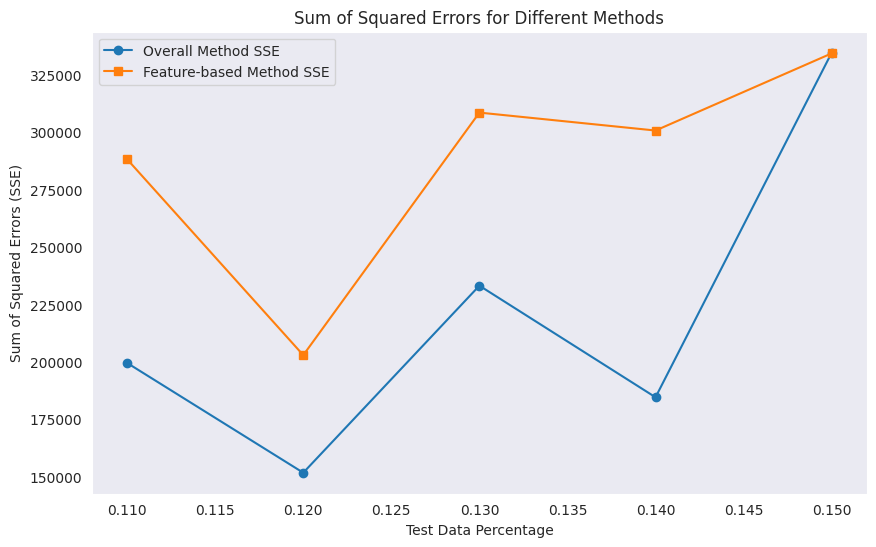

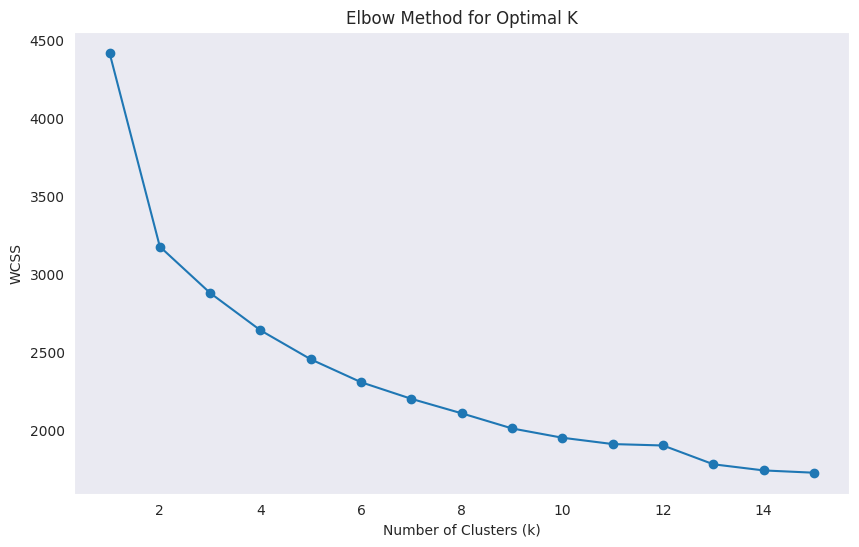

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from seaborn import set_style

set_style('darkgrid')

# بارگذاری دیتا ست دیابت
diabet = load_diabetes()
data = pd.DataFrame(diabet.data, columns=diabet.feature_names)
data["target"] = diabet.target

# پیش‌پردازش داده‌ها (استانداردسازی)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])  # تمامی ستون‌ها به جز ستون نتیجه

# استفاده از K-Means برای تعیین تعداد کلاستر
wcss = []
max_k = 15

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

diff = np.diff(wcss)
diff2 = np.diff(diff)
optimal_k = np.argmin(diff2) + 2
print(f"Optimal number of clusters: {optimal_k}")

# اجرای K-Means با تعداد کلاسترهای بهینه
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

# ایجاد مجموعه تست
percentages = np.arange(0.11, 0.16, 0.01)
sse_overall = []
sse_feature_based = []

for p in percentages:
    test_size = int(len(data) * p)
    test_data = data.sample(n=test_size)
    train_data = data.drop(test_data.index)

    if len(train_data) < 1:
        print("No data available for training.")
        continue

    # KNN کلی
    knn_overall = KNeighborsRegressor(n_neighbors=min(5, len(train_data)//2))  # تعداد همسایه‌ها
    knn_overall.fit(data_scaled[train_data.index], train_data['target'])
    overall_predictions = knn_overall.predict(scaler.transform(test_data.iloc[:, :-2]))

    # KNN ویژگی‌محور
    feature_based_predictions = []  # لیست پیش‌بینی‌های ویژگی‌محور
    for i in range(data.shape[1] - 2):  # به جز ستون‌های target و Cluster
        X_train_feature = train_data.iloc[:, [i]].values
        X_test_feature = test_data.iloc[:, [i]].values

        knn_feature = KNeighborsRegressor(n_neighbors=min(5, len(train_data)//2))
        knn_feature.fit(X_train_feature, train_data['target'])
        feature_predictions = knn_feature.predict(X_test_feature)
        feature_based_predictions.append(feature_predictions)

    # میانگین پیش‌بینی‌های ویژگی‌محور
    feature_based_predictions = np.mean(feature_based_predictions, axis=0)

    # محاسبه مجموع مربعات اختلاف برای هر روش
    overall_difference = overall_predictions - test_data['target'].values
    feature_based_difference = feature_based_predictions - test_data['target'].values

    # محاسبه SSE برای هر روش
    sse_overall.append(np.sum(overall_difference ** 2))
    sse_feature_based.append(np.sum(feature_based_difference ** 2))

    # نمایش اختلافات
    result_df = pd.DataFrame({
        "Actual Target": test_data['target'].values,
        "Predicted Target (Overall)": overall_predictions,
        "Predicted Target (Feature-based)": feature_based_predictions,
        "Difference (Overall)": overall_difference,
        "Difference (Feature-based)": feature_based_difference
    })

    print(f"Results for Percentage: {p:.2f}")
    print(result_df[['Actual Target', 'Predicted Target (Overall)', 'Predicted Target (Feature-based)',
                     'Difference (Overall)', 'Difference (Feature-based)']])
    print("\n")

# رسم نمودار مجموع مربعات اختلاف
plt.figure(figsize=(10, 6))
plt.plot(percentages, sse_overall, marker='o', label='Overall Method SSE')
plt.plot(percentages, sse_feature_based, marker='s', label='Feature-based Method SSE')
plt.title('Sum of Squared Errors for Different Methods')
plt.xlabel('Test Data Percentage')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend()
plt.grid()
plt.show()

# رسم نمودار البو
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()